In [1]:
conda install -c mikesilva xgboost

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

/Users/fred0522/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv('/Users/fred0522/Desktop/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
y_mapping={'no':0,'yes':1}
job_mapping={ 'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11}
marital_mapping={'divorced':0,'married':1,'single':2,'unknown':3}
education_mapping={'primary':0,'secondary':1,'tertiary':2,'unknown':3}
default_mapping={'no':0,'yes':1,"unknown":2}
housing_mapping={'no':0,'yes':1,"unknown":2}
loan_mapping={'no':0,'yes':1,"unknown":2}
contact_mapping={'cellular':0,'telephone':1,"unknown":2}
month_mapping={'jan':0,'feb':1,'mar':2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
poutcome_mapping={ 'failure':0,'other':1,'success':2,"unknown":3}

df['y']=df['y'].map(y_mapping)
df['job']=df['job'].map(job_mapping)
df['marital']=df['marital'].map(marital_mapping)
df['education']=df['education'].map(education_mapping)
df['default']=df['default'].map(default_mapping)
df['housing']=df['housing'].map(housing_mapping)
df['loan']=df['loan'].map(loan_mapping)
df['contact']=df['contact'].map(contact_mapping)
df['month']=df['month'].map(month_mapping)
df['poutcome']=df['poutcome'].map(poutcome_mapping)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,4,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,4,198,1,-1,0,3,0


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(labels=['y'],axis=1).values
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (31647, 16)
test shape: (13564, 16)


In [6]:
from xgboost import XGBClassifier
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

[17:09:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/fred0522/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [7]:
#訓練結果
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))

訓練集:  0.9577211110057825
測試集:  0.9057062813329402


In [8]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"])
df_test['y'] = y_test
pred = xgboostModel.predict(X_test)
df_test['Predict'] = pred

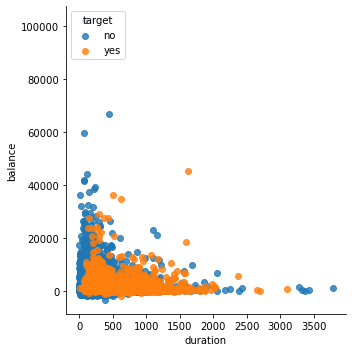

In [9]:
#真實分類
sns.lmplot(x="duration", y="balance", hue="y", data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=["no","yes"])
plt.show()

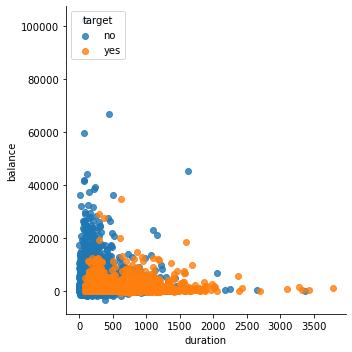

In [10]:
#訓練集預測結果
sns.lmplot(x="duration", y="balance", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=["no","yes"])
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print("MAE: ",mae)

MAE:  0.09429371866705986


In [12]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

RMSE:  0.3070728230681769


In [13]:
mape = mean_absolute_error(y_test,pred)*100
print("MAPE: ",mape)

MAPE:  9.429371866705987
